In [1]:
#import necessary libraries
%matplotlib inline
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in all the data files
cond_data = pd.read_csv("OperatingConditionsData.csv")
train_data = pd.read_csv("Train.csv")
compl_data = pd.read_csv("ComplaintsLog.csv")
comp_service_data = pd.read_csv("ComponentServiceLog.csv")
comp_replace_data = pd.read_csv("ComponentReplacementLog.csv")
machine_det_data= pd.read_csv("MachinesDetails.csv")

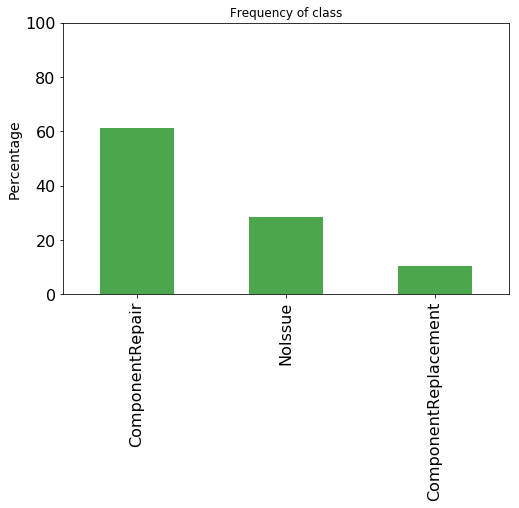

In [3]:
#Plot and see the counts of actions in train data
ind_percents = ((train_data.ActionPoint.value_counts()/sum(train_data.ActionPoint.value_counts()))*100)
plt.figure()
ind_percents.plot(kind='bar',figsize=(8,5),color=["green"],alpha = 0.7,fontsize=16)
plt.ylim([0,100])
plt.title('Frequency of class')
plt.ylabel('Percentage',fontsize = 14)
plt.show()

In [4]:
#Take out hour from the hh:mm:ss and merge it with the remaining date columns to get an event timestamp in all file dataframes

cond_data["hour"] = cond_data.Time.str.slice(0, 2)
compl_data["hour"] = compl_data.Time.str.slice(0, 2)
comp_replace_data["hour"] = comp_replace_data.Time.str.slice(0, 2)
comp_service_data["hour"] = comp_service_data.Time.str.slice(0, 2)

cond_data["event_timestamp"]=pd.to_datetime(cond_data[['Year', 'Month', 'Day', 'hour']])
compl_data["event_timestamp"]=pd.to_datetime(compl_data[['Year', 'Month', 'Day', 'hour']])
comp_replace_data["event_timestamp"]=pd.to_datetime(comp_replace_data[['Year', 'Month', 'Day', 'hour']])
comp_service_data["event_timestamp"]=pd.to_datetime(comp_service_data[['Year', 'Month', 'Day', 'hour']])

In [5]:
comp_service_data.drop(['Day','Month','Year','hour','Time'],axis = 1, inplace=True)
cond_data.drop(['Day','Month','Year','hour','Time'],axis = 1, inplace=True)
compl_data.drop(['Day','Month','Year','hour','Time'],axis = 1, inplace=True)
comp_replace_data.drop(['Day','Month','Year','hour','Time'],axis = 1, inplace=True)


In [6]:
print(cond_data.head())
print(cond_data.tail())
print("\n\n")
print(compl_data.head())
print(compl_data.tail())
print("\n\n")
print(comp_replace_data.head())
print(comp_replace_data.tail())
print("\n\n")
print(comp_service_data.head())
print(comp_service_data.tail())

  MachineID     Sensor1     Sensor2     Sensor3    Sensor4     event_timestamp
0  MID10889  190.860059  402.956047   99.838060  32.369191 2017-01-01 06:00:00
1  MID10889  168.825805  437.673549  116.476080  32.046604 2017-01-01 07:00:00
2  MID10889  157.674385  462.601905   95.230526  53.281389 2017-01-01 08:00:00
3  MID10889  142.552238  515.138959  117.245483  36.525593 2017-01-01 09:00:00
4  MID10889  176.730195  448.725899   95.536274  44.752883 2017-01-01 10:00:00
        MachineID   Sensor1   Sensor2    Sensor3   Sensor4     event_timestamp
9211495  MID11228  176.0029  466.0402   96.98566  42.62238 2017-11-30 19:00:00
9211496  MID11228  160.8821  478.9104   98.32616  33.68387 2017-11-30 20:00:00
9211497  MID11228  173.0875  405.5505  105.24030  35.59405 2017-11-30 21:00:00
9211498  MID11228  190.0894  472.0948  113.08650  44.00402 2017-11-30 22:00:00
9211499  MID11228  152.9487  529.2327  104.85980  42.30310 2017-11-30 23:00:00



  MachineID ErrorID     event_timestamp
0  MID108

In [7]:
#Take registered complaints and form dataset with sensor readings in it
error_readings_data = pd.merge(compl_data,cond_data,  how='left', left_on=['MachineID','event_timestamp'], right_on = ['MachineID','event_timestamp'])

In [8]:
print(error_readings_data.head())
print(error_readings_data.tail())
print(error_readings_data.isnull().sum())

  MachineID ErrorID     event_timestamp     Sensor1     Sensor2     Sensor3  \
0  MID10889  error1 2017-01-06 06:00:00  184.683179  435.684439  111.362469   
1  MID10889  error2 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
2  MID10889  error3 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
3  MID10889  error4 2017-02-22 04:00:00  175.750162  429.954216   84.852365   
4  MID10889  error1 2017-03-22 06:00:00  207.764180  544.320260   99.882954   

     Sensor4  
0  43.696716  
1  42.808727  
2  42.808727  
3  37.941056  
4  41.681690  
      MachineID ErrorID     event_timestamp   Sensor1   Sensor2    Sensor3  \
12623  MID11228  error1 2017-07-05 04:00:00  153.0150  477.1425   97.64363   
12624  MID11228  error2 2017-08-12 06:00:00  159.1933  407.6140  101.88550   
12625  MID11228  error3 2017-08-12 06:00:00  159.1933  407.6140  101.88550   
12626  MID11228  error1 2017-09-11 06:00:00  190.0667  424.3838  111.42560   
12627  MID11228  error3 2017-10-11 14:00:00  

In [9]:
print(error_readings_data.shape)
print(error_readings_data.drop_duplicates().shape)

(12628, 7)
(12628, 7)


In [10]:
#Add service periods and model numbers to the previous dataset
error_serviceperiod_data = pd.merge(error_readings_data,machine_det_data,  how='left', left_on=['MachineID'], right_on = ['MachineID'])

In [11]:
error_serviceperiod_data.head(10)

MachineID ErrorID     event_timestamp     Sensor1     Sensor2     Sensor3  \
0  MID10889  error1 2017-01-06 06:00:00  184.683179  435.684439  111.362469   
1  MID10889  error2 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
2  MID10889  error3 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
3  MID10889  error4 2017-02-22 04:00:00  175.750162  429.954216   84.852365   
4  MID10889  error1 2017-03-22 06:00:00  207.764180  544.320260   99.882954   
5  MID10889  error1 2017-05-04 17:00:00  181.142507  434.377792  121.628724   
6  MID10889  error1 2017-06-14 16:00:00  150.624069  575.722807  103.607219   
7  MID10889  error2 2017-06-20 06:00:00  157.174707  340.739953  105.628959   
8  MID10889  error3 2017-06-20 06:00:00  157.174707  340.739953  105.628959   
9  MID10889  error5 2017-07-18 08:00:00  173.153136  476.625597  101.095688   

     Sensor4 MachineModel  ServicePeriod  
0  43.696716       model3              7  
1  42.808727       model3              7  
2  42.808727       model3              7  
3  37.941056       model3              7  
4  41.681690       model3              7  
5  45.294079       model3              7  
6  45.379806       model3              7  
7  42.013704       model3              7  
8  42.013704       model3              7  
9  42.397772       model3              7

In [12]:
print(error_serviceperiod_data.isnull().sum())
print(error_serviceperiod_data.shape)

MachineID          0
ErrorID            0
event_timestamp    0
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
MachineModel       0
ServicePeriod      0
dtype: int64
(12628, 9)


In [13]:
#All the actions in the complaint replacementlog data is of the type replacement. Add a column with the same
comp_replace_data["ActionPoint"] = "ComponentReplacement"

In [14]:
#Dummify component types
comp_dummies = pd.get_dummies(comp_replace_data.ComponentReplacement)
comp_dummies.columns = ['Component1', 'Component2', 'Component3','Component4']
comp_replace_data = comp_replace_data.join(comp_dummies)


In [15]:
comp_replace_data.head(2005)

MachineID ComponentReplacement     event_timestamp           ActionPoint  \
0     MID10889           Component1 2017-01-07 06:00:00  ComponentReplacement   
1     MID10889           Component2 2017-02-21 06:00:00  ComponentReplacement   
2     MID10889           Component1 2017-03-23 06:00:00  ComponentReplacement   
3     MID10889           Component2 2017-06-21 06:00:00  ComponentReplacement   
4     MID10898           Component2 2017-02-10 06:00:00  ComponentReplacement   
5     MID10898           Component2 2017-03-27 06:00:00  ComponentReplacement   
6     MID10898           Component2 2017-05-11 06:00:00  ComponentReplacement   
7     MID10898           Component2 2017-06-10 06:00:00  ComponentReplacement   
8     MID10898           Component2 2017-08-24 06:00:00  ComponentReplacement   
9     MID10928           Component1 2017-01-26 06:00:00  ComponentReplacement   
10    MID10928           Component2 2017-07-10 06:00:00  ComponentReplacement   
11    MID10928           Component1 2017-07-25 06:00:00  ComponentReplacement   
12    MID10928           Component2 2017-08-09 06:00:00  ComponentReplacement   
13    MID10847           Component2 2017-01-23 06:00:00  ComponentReplacement   
14    MID10847           Component2 2017-03-24 06:00:00  ComponentReplacement   
15    MID10847           Component4 2017-04-08 06:00:00  ComponentReplacement   
16    MID10847           Component4 2017-05-23 06:00:00  ComponentReplacement   
17    MID10847           Component2 2017-06-07 06:00:00  ComponentReplacement   
18    MID10847           Component4 2017-08-21 06:00:00  ComponentReplacement   
19    MID10847           Component2 2017-10-20 06:00:00  ComponentReplacement   
20    MID10847           Component4 2017-11-19 06:00:00  ComponentReplacement   
21    MID10825           Component4 2017-01-03 06:00:00  ComponentReplacement   
22    MID10825           Component2 2017-01-18 06:00:00  ComponentReplacement   
23    MID10825           Component2 2017-03-04 06:00:00  ComponentReplacement   
24    MID10825           Component1 2017-04-18 06:00:00  ComponentReplacement   
25    MID10825           Component4 2017-04-18 06:00:00  ComponentReplacement   
26    MID10825           Component4 2017-06-02 06:00:00  ComponentReplacement   
27    MID10825           Component4 2017-08-16 06:00:00  ComponentReplacement   
28    MID10825           Component4 2017-10-15 06:00:00  ComponentReplacement   
29    MID10828           Component1 2017-01-30 06:00:00  ComponentReplacement   
...        ...                  ...                 ...                   ...   
1975  MID11188           Component4 2017-01-02 03:00:00  ComponentReplacement   
1976  MID11188           Component4 2017-03-17 06:00:00  ComponentReplacement   
1977  MID11188           Component4 2017-06-15 06:00:00  ComponentReplacement   
1978  MID11188           Component2 2017-07-30 06:00:00  ComponentReplacement   
1979  MID11188           Component4 2017-08-29 06:00:00  ComponentReplacement   
1980  MID11188           Component4 2017-10-28 06:00:00  ComponentReplacement   
1981  MID11057           Component4 2017-01-02 03:00:00  ComponentReplacement   
1982  MID11057           Component1 2017-01-19 06:00:00  ComponentReplacement   
1983  MID11057           Component2 2017-01-19 06:00:00  ComponentReplacement   
1984  MID11057           Component4 2017-02-03 06:00:00  ComponentReplacement   
1985  MID11057           Component2 2017-03-05 06:00:00  ComponentReplacement   
1986  MID11057           Component4 2017-05-19 06:00:00  ComponentReplacement   
1987  MID11057           Component2 2017-06-18 06:00:00  ComponentReplacement   
1988  MID11057           Component4 2017-08-02 06:00:00  ComponentReplacement   
1989  MID11057           Component1 2017-08-17 06:00:00  ComponentReplacement   
1990  MID11057           Component4 2017-09-16 06:00:00  ComponentReplacement   
1991  MID11057           Component1 2017-10-01 06:00:00  ComponentReplacement   
1992  MID11057           Component4 

In [16]:
comp_replace_data.drop(['ComponentReplacement'],axis = 1, inplace= True)

In [17]:
comp_replace_data = comp_replace_data.drop_duplicates()
print(comp_replace_data.shape)

(7087, 7)


In [18]:
#Get sensor readings for replaced components based on their ids and timestamps
comp_replace_data = pd.merge(comp_replace_data,cond_data,  how='left', left_on=['MachineID','event_timestamp'], right_on = ['MachineID','event_timestamp'])

In [19]:
comp_replace_data.event_timestamp.unique()

array(['2017-01-07T06:00:00.000000000', '2017-02-21T06:00:00.000000000',
       '2017-03-23T06:00:00.000000000', '2017-06-21T06:00:00.000000000',
       '2017-02-10T06:00:00.000000000', '2017-03-27T06:00:00.000000000',
       '2017-05-11T06:00:00.000000000', '2017-06-10T06:00:00.000000000',
       '2017-08-24T06:00:00.000000000', '2017-01-26T06:00:00.000000000',
       '2017-07-10T06:00:00.000000000', '2017-07-25T06:00:00.000000000',
       '2017-08-09T06:00:00.000000000', '2017-01-23T06:00:00.000000000',
       '2017-03-24T06:00:00.000000000', '2017-04-08T06:00:00.000000000',
       '2017-05-23T06:00:00.000000000', '2017-06-07T06:00:00.000000000',
       '2017-08-21T06:00:00.000000000', '2017-10-20T06:00:00.000000000',
       '2017-11-19T06:00:00.000000000', '2017-01-03T06:00:00.000000000',
       '2017-01-18T06:00:00.000000000', '2017-03-04T06:00:00.000000000',
       '2017-04-18T06:00:00.000000000', '2017-06-02T06:00:00.000000000',
       '2017-08-16T06:00:00.000000000', '2017-10-15

In [20]:
print(comp_replace_data.drop_duplicates().shape)
print(comp_replace_data.isnull().sum())

(7087, 11)
MachineID          0
event_timestamp    0
ActionPoint        0
Component1         0
Component2         0
Component3         0
Component4         0
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
dtype: int64


In [21]:
#Dummify components from the servicelog data
comp_service_dummies = pd.get_dummies(comp_service_data.ComponentAttended)
comp_service_dummies.columns = ['Component1', 'Component2', 'Component3','Component4']
comp_service_data = comp_service_data.join(comp_service_dummies)
comp_service_data.head(5)

MachineID ComponentAttended       ServiceType     event_timestamp  \
0  MID10889        Component1  ScheduledService 2016-06-01 06:00:00   
1  MID10889        Component2  ScheduledService 2016-06-01 06:00:00   
2  MID10889        Component3   ComponentRepair 2016-07-31 06:00:00   
3  MID10889        Component4   ComponentRepair 2016-09-14 06:00:00   
4  MID10889        Component1   ComponentRepair 2017-01-07 06:00:00   

   Component1  Component2  Component3  Component4  
0           1           0           0           0  
1           0           1           0           0  
2           0           0           1           0  
3           0           0           0           1  
4           1           0           0           0

In [22]:
comp_service_data.drop(['ComponentAttended'],axis = 1, inplace= True)

In [23]:
#Servicetype is essentially actions taken. We can rename it to ActionPoint
comp_service_data = comp_service_data.rename(columns={'ServiceType': 'ActionPoint'})

In [24]:
comp_service_data.shape

(34490, 7)

In [25]:
comp_service_data.tail()

MachineID      ActionPoint     event_timestamp  Component1  Component2  \
34485  MID11228  ComponentRepair 2017-09-12 06:00:00           1           0   
34486  MID11228  ComponentRepair 2017-09-27 06:00:00           1           0   
34487  MID11228  ComponentRepair 2017-10-12 06:00:00           1           0   
34488  MID11228  ComponentRepair 2017-10-27 06:00:00           1           0   
34489  MID11228  ComponentRepair 2017-11-11 06:00:00           1           0   

       Component3  Component4  
34485           0           0  
34486           0           0  
34487           0           0  
34488           0           0  
34489           0           0

In [26]:
# Add sensory reading details to service log data based on Ids and time of service 
comp_service_data = pd.merge(comp_service_data,cond_data,  how='left', left_on=['MachineID','event_timestamp'], right_on = ['MachineID','event_timestamp'])

In [27]:
comp_service_data.event_timestamp.unique()

array(['2016-06-01T06:00:00.000000000', '2016-07-31T06:00:00.000000000',
       '2016-09-14T06:00:00.000000000', '2017-01-07T06:00:00.000000000',
       '2017-01-22T06:00:00.000000000', '2017-02-06T06:00:00.000000000',
       '2017-02-21T06:00:00.000000000', '2017-03-08T06:00:00.000000000',
       '2017-03-23T06:00:00.000000000', '2017-04-07T06:00:00.000000000',
       '2017-04-22T06:00:00.000000000', '2017-05-07T06:00:00.000000000',
       '2017-05-22T06:00:00.000000000', '2017-06-21T06:00:00.000000000',
       '2017-07-06T06:00:00.000000000', '2017-07-21T06:00:00.000000000',
       '2017-08-05T06:00:00.000000000', '2017-08-20T06:00:00.000000000',
       '2017-09-04T06:00:00.000000000', '2017-10-04T06:00:00.000000000',
       '2017-10-19T06:00:00.000000000', '2017-11-03T06:00:00.000000000',
       '2017-11-18T06:00:00.000000000', '2016-06-16T06:00:00.000000000',
       '2016-07-01T06:00:00.000000000', '2016-08-15T06:00:00.000000000',
       '2017-01-26T06:00:00.000000000', '2017-02-10

In [28]:
#Now the dimensions and values of both serviced details and replaced details are same. Let us combine it to one single dataframe
comp_rep_ser_data = comp_replace_data.append(comp_service_data)

In [29]:
comp_rep_ser_data.isnull().sum()

ActionPoint           0
Component1            0
Component2            0
Component3            0
Component4            0
MachineID             0
Sensor1            4600
Sensor2            4600
Sensor3            4600
Sensor4            4600
event_timestamp       0
dtype: int64

In [30]:
comp_rep_ser_data.shape

(41577, 11)

In [31]:
comp_rep_ser_data.event_timestamp.unique

<bound method Series.unique of 0       2017-01-07 06:00:00
1       2017-02-21 06:00:00
2       2017-03-23 06:00:00
3       2017-06-21 06:00:00
4       2017-02-10 06:00:00
5       2017-03-27 06:00:00
6       2017-05-11 06:00:00
7       2017-06-10 06:00:00
8       2017-08-24 06:00:00
9       2017-01-26 06:00:00
10      2017-07-10 06:00:00
11      2017-07-25 06:00:00
12      2017-08-09 06:00:00
13      2017-01-23 06:00:00
14      2017-03-24 06:00:00
15      2017-04-08 06:00:00
16      2017-05-23 06:00:00
17      2017-06-07 06:00:00
18      2017-08-21 06:00:00
19      2017-10-20 06:00:00
20      2017-11-19 06:00:00
21      2017-01-03 06:00:00
22      2017-01-18 06:00:00
23      2017-03-04 06:00:00
24      2017-04-18 06:00:00
25      2017-04-18 06:00:00
26      2017-06-02 06:00:00
27      2017-08-16 06:00:00
28      2017-10-15 06:00:00
29      2017-01-30 06:00:00
                ...        
34460   2017-10-23 06:00:00
34461   2017-10-23 06:00:00
34462   2017-11-07 06:00:00
34463   2017-11-2

In [32]:
apd_withreadings_data = pd.merge(comp_rep_ser_data,cond_data, how='left', left_on=['MachineID','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4'], right_on = ['MachineID','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4'])
#There are 4600 null values that do not have sensory readings data in the  operating conditions file. But this does not affect our modelling as the number of observations are high. We will remove it at a later stage.

In [33]:
apd_withreadings_data.event_timestamp.unique()

array(['2017-01-07T06:00:00.000000000', '2017-02-21T06:00:00.000000000',
       '2017-03-23T06:00:00.000000000', '2017-06-21T06:00:00.000000000',
       '2017-02-10T06:00:00.000000000', '2017-03-27T06:00:00.000000000',
       '2017-05-11T06:00:00.000000000', '2017-06-10T06:00:00.000000000',
       '2017-08-24T06:00:00.000000000', '2017-01-26T06:00:00.000000000',
       '2017-07-10T06:00:00.000000000', '2017-07-25T06:00:00.000000000',
       '2017-08-09T06:00:00.000000000', '2017-01-23T06:00:00.000000000',
       '2017-03-24T06:00:00.000000000', '2017-04-08T06:00:00.000000000',
       '2017-05-23T06:00:00.000000000', '2017-06-07T06:00:00.000000000',
       '2017-08-21T06:00:00.000000000', '2017-10-20T06:00:00.000000000',
       '2017-11-19T06:00:00.000000000', '2017-01-03T06:00:00.000000000',
       '2017-01-18T06:00:00.000000000', '2017-03-04T06:00:00.000000000',
       '2017-04-18T06:00:00.000000000', '2017-06-02T06:00:00.000000000',
       '2017-08-16T06:00:00.000000000', '2017-10-15

In [34]:
apd_withreadings_data.drop_duplicates().shape

(41577, 11)

In [35]:
apd_withreadings_data.head()

ActionPoint  Component1  Component2  Component3  Component4  \
0  ComponentReplacement           1           0           0           0   
1  ComponentReplacement           0           1           0           0   
2  ComponentReplacement           1           0           0           0   
3  ComponentReplacement           0           1           0           0   
4  ComponentReplacement           0           1           0           0   

  MachineID     Sensor1     Sensor2     Sensor3    Sensor4     event_timestamp  
0  MID10889  184.934180  503.444049   93.812773  39.087756 2017-01-07 06:00:00  
1  MID10889  168.123596  411.475492   87.283553  38.291023 2017-02-21 06:00:00  
2  MID10889  182.390822  474.712407  102.214781  50.246393 2017-03-23 06:00:00  
3  MID10889  154.394357  413.117641  114.851772  39.946298 2017-06-21 06:00:00  
4  MID10898  155.675812  353.992202   98.729670  36.599353 2017-02-10 06:00:00

In [36]:
#Add machine details data to the same to include model numbers and service periods
apd_withreadingsandmodel_data = pd.merge(apd_withreadings_data,machine_det_data, how='left', left_on=['MachineID'], right_on = ['MachineID'])

In [37]:
apd_withreadingsandmodel_data.drop_duplicates().shape

(41577, 13)

In [38]:
apd_withreadingsandmodel_data.isnull().sum()

ActionPoint           0
Component1            0
Component2            0
Component3            0
Component4            0
MachineID             0
Sensor1            4600
Sensor2            4600
Sensor3            4600
Sensor4            4600
event_timestamp       0
MachineModel          0
ServicePeriod         0
dtype: int64

In [39]:
#Dummify error attribute
comp_error_dummies = pd.get_dummies(error_serviceperiod_data.ErrorID)
comp_error_dummies.columns = ['Error1', 'Error2', 'Error3','Error4','Error5']
error_serviceperiod_data = error_serviceperiod_data.join(comp_error_dummies)
error_serviceperiod_data.drop(["ErrorID"],axis=1,inplace=True)


In [40]:
error_serviceperiod_data.isnull().sum() # (1005)

MachineID          0
event_timestamp    0
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
MachineModel       0
ServicePeriod      0
Error1             0
Error2             0
Error3             0
Error4             0
Error5             0
dtype: int64

In [41]:
#This is to make service details data have the same dimensions as error details data. All component values will be zero to show that no replacement was done and it was either a repair or noissue
servprd_dummy= pd.DataFrame(0, index=np.arange(len(error_serviceperiod_data)), columns=['Component1', 'Component2', 'Component3','Component4'])
error_serviceperiod_data=error_serviceperiod_data.join(servprd_dummy)
#error_serviceperiod_data['Error6']=0
#error_serviceperiod_data['Component5']=1

In [42]:
#This is to make error details data have the same dimensions as service details data. All errors will be zero to show that it was not an error at all.
apd_dummy= pd.DataFrame(0, index=np.arange(len(apd_withreadingsandmodel_data)), columns=['Error1', 'Error2', 'Error3','Error4','Error5'])
apd_withreadingsandmodel_data = apd_withreadingsandmodel_data.join(apd_dummy)

In [43]:
apd_withreadingsandmodel_data.head(1000)

ActionPoint  Component1  Component2  Component3  Component4  \
0    ComponentReplacement           1           0           0           0   
1    ComponentReplacement           0           1           0           0   
2    ComponentReplacement           1           0           0           0   
3    ComponentReplacement           0           1           0           0   
4    ComponentReplacement           0           1           0           0   
5    ComponentReplacement           0           1           0           0   
6    ComponentReplacement           0           1           0           0   
7    ComponentReplacement           0           1           0           0   
8    ComponentReplacement           0           1           0           0   
9    ComponentReplacement           1           0           0           0   
10   ComponentReplacement           0           1           0           0   
11   ComponentReplacement           1           0           0           0   
12   ComponentReplacement           0           1           0           0   
13   ComponentReplacement           0           1           0           0   
14   ComponentReplacement           0           1           0           0   
15   ComponentReplacement           0           0           0           1   
16   ComponentReplacement           0           0           0           1   
17   ComponentReplacement           0           1           0           0   
18   ComponentReplacement           0           0           0           1   
19   ComponentReplacement           0           1           0           0   
20   ComponentReplacement           0           0           0           1   
21   ComponentReplacement           0           0           0           1   
22   ComponentReplacement           0           1           0           0   
23   ComponentReplacement           0           1           0           0   
24   ComponentReplacement           1           0           0           0   
25   ComponentReplacement           0           0           0           1   
26   ComponentReplacement           0           0           0           1   
27   ComponentReplacement           0           0           0           1   
28   ComponentReplacement           0           0           0           1   
29   ComponentReplacement           1           0           0           0   
..                    ...         ...         ...         ...         ...   
970  ComponentReplacement           1           0           0           0   
971  ComponentReplacement           0           0           1           0   
972  ComponentReplacement           0           1           0           0   
973  ComponentReplacement           0           0           1           0   
974  ComponentReplacement           1           0           0           0   
975  ComponentReplacement           0           0           1           0   
976  ComponentReplacement           0           1           0           0   
977  ComponentReplacement           1           0           0           0   
978  ComponentReplacement           0           1           0           0   
979  ComponentReplacement           1           0           0           0   
980  ComponentReplacement           0           1           0           0   
981  ComponentReplacement           0           0           1           0   
982  ComponentReplacement           0           0           1           0   
983  ComponentReplacement           1           0           0           0   
984  ComponentReplacement           0           0           0           1   
985  ComponentReplacement           0           1           0           0   
986  ComponentReplacement           0           0           0           1   
987  ComponentReplacement           0           1           0           0   
988  ComponentReplacement           0           0           0           1   
989  ComponentReplacement           0           0           0           1   
990  Compo

In [44]:
apd_withreadingsandmodel_data.ActionPoint.unique()

array(['ComponentReplacement', 'ScheduledService', 'ComponentRepair'], dtype=object)

In [45]:
#We can replace ScheduledService with NoIssues as per problem statement (Machine is still working)
apd_withreadingsandmodel_data.loc[apd_withreadingsandmodel_data.ActionPoint=="ScheduledService",'ActionPoint'] = "NoIssue"

In [46]:
error_serviceperiod_data.head(1000)

MachineID     event_timestamp     Sensor1     Sensor2     Sensor3  \
0    MID10889 2017-01-06 06:00:00  184.683179  435.684439  111.362469   
1    MID10889 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
2    MID10889 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
3    MID10889 2017-02-22 04:00:00  175.750162  429.954216   84.852365   
4    MID10889 2017-03-22 06:00:00  207.764180  544.320260   99.882954   
5    MID10889 2017-05-04 17:00:00  181.142507  434.377792  121.628724   
6    MID10889 2017-06-14 16:00:00  150.624069  575.722807  103.607219   
7    MID10889 2017-06-20 06:00:00  157.174707  340.739953  105.628959   
8    MID10889 2017-06-20 06:00:00  157.174707  340.739953  105.628959   
9    MID10889 2017-07-18 08:00:00  173.153136  476.625597  101.095688   
10   MID10898 2017-02-09 06:00:00  188.384122  442.309894  100.948913   
11   MID10898 2017-02-09 06:00:00  188.384122  442.309894  100.948913   
12   MID10898 2017-03-26 06:00:00  170.615285  276.262318   93.153394   
13   MID10898 2017-03-26 06:00:00  170.615285  276.262318   93.153394   
14   MID10898 2017-04-28 12:00:00  165.700196  425.954456  100.592360   
15   MID10898 2017-05-10 06:00:00  168.333916  405.400395   94.316855   
16   MID10898 2017-05-10 06:00:00  168.333916  405.400395   94.316855   
17   MID10898 2017-06-09 06:00:00  173.943974  388.189799  112.197229   
18   MID10898 2017-06-09 06:00:00  173.943974  388.189799  112.197229   
19   MID10898 2017-07-09 17:00:00  173.600832  368.202616   98.277286   
20   MID10898 2017-08-23 06:00:00  179.208968  296.503061  112.892644   
21   MID10898 2017-08-23 06:00:00  179.208968  296.503061  112.892644   
22   MID10898 2017-10-15 09:00:00  179.180560  414.683142  101.180032   
23   MID10928 2017-01-16 06:00:00  167.412584  391.597294   93.723410   
24   MID10928 2017-01-25 06:00:00  201.293066  407.608213  124.052848   
25   MID10928 2017-02-04 08:00:00  160.809779  486.883271   86.888797   
26   MID10928 2017-03-27 00:00:00  158.564514  364.517224  125.079354   
27   MID10928 2017-07-09 06:00:00  170.346316  377.543932   94.021833   
28   MID10928 2017-07-09 06:00:00  170.346316  377.543932   94.021833   
29   MID10928 2017-07-24 06:00:00  211.024808  520.590348  109.248473   
..        ...                 ...         ...         ...         ...   
970  MID10922 2017-02-27 06:00:00  182.062492  310.815399  115.031232   
971  MID10922 2017-04-28 06:00:00  163.341497  352.854340  105.802352   
972  MID10922 2017-04-28 06:00:00  163.341497  352.854340  105.802352   
973  MID10922 2017-05-28 06:00:00  175.299042  447.396881   94.035584   
974  MID10922 2017-09-10 06:00:00  183.867642  412.582999   90.075071   
975  MID10922 2017-09-10 06:00:00  183.867642  412.582999   90.075071   
976  MID10922 2017-10-10 06:00:00  170.424955  369.453810   93.377369   
977  MID10922 2017-10-10 06:00:00  170.424955  369.453810   93.377369   
978  MID10815 2017-01-06 06:00:00  171.714491  491.306721  111.639030   
979  MID10815 2017-03-22 06:00:00  177.901508  482.990205   92.429525   
980  MID10815 2017-04-21 06:00:00  182.965545  452.932846  106.030125   
981  MID10815 2017-09-18 06:00:00  185.607310  284.221864  108.870691   
982  MID10815 2017-09-18 06:00:00  185.607310  284.221864  108.870691   
983  MID10815 2017-09-18 06:00:00  185.607310  284.221864  108.870691   
984  MID10815 2017-09-25 01:00:00  185.908615  420.661254  104.369340   
985  MID10815 2017-10-05 02:00:00  173.006738  450.163360   88.916147   
986  MID10815 2017-11-02 06:00:00  162.726783  382.290497   95.093068   
987  MID10823 2017-02-07 06:00:00  160.790656  500.021965  125.794032   
988  MID10823 2017-03-09 06:00:00  171.081394  415.972575  110.611156   
989  MID10823 2017-03-20 20:00:00  162.372613  355.317551   99.234716   
990  MID10823 2017-03-24 06:00:00  184.074114  505.902977  147.463848   
991  MID10823 2017-05-08 06:00:00  180.767639  503.492147  131.519193   
992  MID10823 2017-05-23 06:00:00  155.199874  321.859502  100

In [47]:
error_serviceperiod_data["ActionPoint"] = "NoIssue"

In [48]:
#Reorder and add both error and service data for our final dataset
apd_withreadingsandmodel_data = apd_withreadingsandmodel_data[['MachineID', 'MachineModel','ServicePeriod','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4','Component1','Component2','Component3','Component4','Error1','Error2','Error3','Error4','Error5','ActionPoint']]
error_serviceperiod_data = error_serviceperiod_data[['MachineID', 'MachineModel','ServicePeriod','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4','Component1','Component2','Component3','Component4','Error1','Error2','Error3','Error4','Error5','ActionPoint']]
error_serviceperiod_data_new = pd.merge(apd_withreadingsandmodel_data,error_serviceperiod_data, how='outer', left_on=['MachineID', 'MachineModel','ServicePeriod','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4','Component1','Component2','Component3','Component4','Error1','Error2','Error3','Error4','Error5',"ActionPoint"], right_on = ['MachineID', 'MachineModel','ServicePeriod','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4','Component1','Component2','Component3','Component4','Error1','Error2','Error3','Error4','Error5',"ActionPoint"])
#error_serviceperiod_data = error_serviceperiod_data.append(apd_withreadingsandmodel_data)

In [49]:
error_serviceperiod_data_new.ActionPoint.unique()

array(['ComponentReplacement', 'NoIssue', 'ComponentRepair'], dtype=object)

In [50]:
final_model_dataset = error_serviceperiod_data_new[['MachineID', 'MachineModel','ServicePeriod','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4','Component1','Component2','Component3','Component4','Error1','Error2','Error3','Error4','Error5','ActionPoint']]

In [51]:
final_model_dataset.ActionPoint.unique()

array(['ComponentReplacement', 'NoIssue', 'ComponentRepair'], dtype=object)

In [52]:
final_model_dataset.tail(10000)

MachineID MachineModel  ServicePeriod     event_timestamp   Sensor1  \
44205  MID11424       model1             13 2017-05-05 06:00:00  190.7483   
44206  MID11424       model1             13 2017-06-19 06:00:00  195.2941   
44207  MID11424       model1             13 2017-06-19 06:00:00  195.2941   
44208  MID11424       model1             13 2017-09-02 06:00:00  161.9827   
44209  MID11424       model1             13 2017-09-17 06:00:00  170.3010   
44210  MID11089       model1             20 2017-01-21 06:00:00  156.8883   
44211  MID11089       model1             20 2017-02-20 06:00:00  186.1566   
44212  MID11089       model1             20 2017-03-27 08:00:00  162.9770   
44213  MID11089       model1             20 2017-04-06 06:00:00  190.4013   
44214  MID11089       model1             20 2017-05-21 06:00:00  170.2118   
44215  MID11089       model1             20 2017-07-20 06:00:00  150.5555   
44216  MID11089       model1             20 2017-08-04 06:00:00  180.4932   
44217  MID11089       model1             20 2017-09-18 06:00:00  155.2285   
44218  MID11089       model1             20 2017-10-18 06:00:00  138.1378   
44219  MID11089       model1             20 2017-11-02 06:00:00  157.8650   
44220  MID11520       model3             10 2017-02-01 06:00:00  182.5679   
44221  MID11520       model3             10 2017-02-01 06:00:00  182.5679   
44222  MID11520       model3             10 2017-02-01 06:00:00  182.5679   
44223  MID11520       model3             10 2017-03-18 06:00:00  170.4161   
44224  MID11520       model3             10 2017-05-02 06:00:00  206.4632   
44225  MID11520       model3             10 2017-05-02 06:00:00  206.4632   
44226  MID11520       model3             10 2017-07-16 06:00:00  196.3021   
44227  MID11520       model3             10 2017-09-29 06:00:00  128.9128   
44228  MID11520       model3             10 2017-09-29 06:00:00  128.9128   
44229  MID11520       model3             10 2017-10-14 06:00:00  188.6173   
44230  MID11183       model3             17 2017-01-05 06:00:00  195.9982   
44231  MID11183       model3             17 2017-03-06 06:00:00  139.3375   
44232  MID11183       model3             17 2017-05-05 06:00:00  172.1697   
44233  MID11183       model3             17 2017-05-05 06:00:00  172.1697   
44234  MID11183       model3             17 2017-07-19 06:00:00  170.6204   
...         ...          ...            ...                 ...       ...   
54175  MID11335       model2             15 2017-10-01 15:00:00  209.5224   
54176  MID11335       model2             15 2017-10-24 10:00:00  179.4498   
54177  MID11335       model2             15 2017-11-28 06:00:00  185.5600   
54178  MID11335       model2             15 2017-11-28 06:00:00  185.5600   
54179  MID12000       model3              1 2017-01-10 06:00:00  176.3093   
54180  MID12000       model3              1 2017-01-10 06:00:00  176.3093   
54181  MID12000       model3              1 2017-02-09 06:00:00  176.6480   
54182  MID12000       model3              1 2017-02-09 06:00:00  176.6480   
54183  MID12000       model3              1 2017-03-11 06:00:00  175.9164   
54184  MID12000       model3              1 2017-03-11 06:00:00  175.9164   
54185  MID12000       model3              1 2017-03-26 06:00:00  174.3984   
54186  MID12000       model3              1 2017-05-25 06:00:00  149.1566   
54187  MID12000       model3              1 2017-05-25 06:00:00  149.1566   
54188  MID12000       model3              1 2017-05-26 09:00:00  171.0046   
54189  MID12000       model3              1 2017-06-24 06:00:00  194.9217   
54190  MID12000       model3              1 2017-08-23 06:00:00  213.0775   
54191  MID12000       model3              1 2017-10-22 06:00:00  155.8671   
54192  MID12000       model3              1 2017-10-22 06:00:00  155.8671   
54193  MID11228       model4             17 2017-01-29 06:00:00  172.7879   
54194  MID11228       model4             17 2017-03-07 08:00:00  168.3387   
54

In [62]:
final_model_dataset.fillna(0,inplace=True)

In [63]:
final_model_dataset.dtypes

MachineID                  object
MachineModel               object
ServicePeriod               int64
event_timestamp    datetime64[ns]
Sensor1                   float64
Sensor2                   float64
Sensor3                   float64
Sensor4                   float64
Component1                  int64
Component2                  int64
Component3                  int64
Component4                  int64
Error1                      int64
Error2                      int64
Error3                      int64
Error4                      int64
Error5                      int64
ActionPoint                object
dtype: object

In [64]:
final_model_dataset.isnull().sum()

MachineID          0
MachineModel       0
ServicePeriod      0
event_timestamp    0
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
Component1         0
Component2         0
Component3         0
Component4         0
Error1             0
Error2             0
Error3             0
Error4             0
Error5             0
ActionPoint        0
dtype: int64

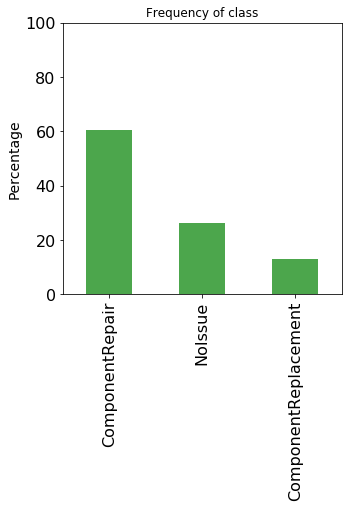

In [65]:
ind_percents = ((final_model_dataset.ActionPoint.value_counts()/sum(final_model_dataset.ActionPoint.value_counts()))*100)
plt.figure()
ind_percents.plot(kind='bar',
                                  figsize=(5,5),
                                  color=["green","red","blue"],
                                  alpha = 0.7,
                                  fontsize=16)

plt.ylim([0,100])
plt.title('Frequency of class')
plt.ylabel('Percentage',fontsize = 14)

plt.show()

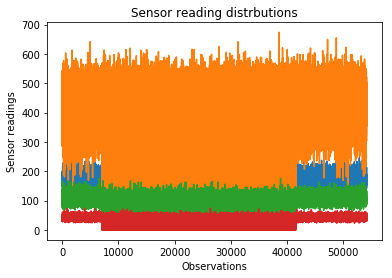

In [66]:
plt.title("Sensor reading distrbutions")
plt.xlabel("Observations")
plt.ylabel("Sensor readings")
plt.plot(final_model_dataset[["Sensor1","Sensor2","Sensor3","Sensor4"]])

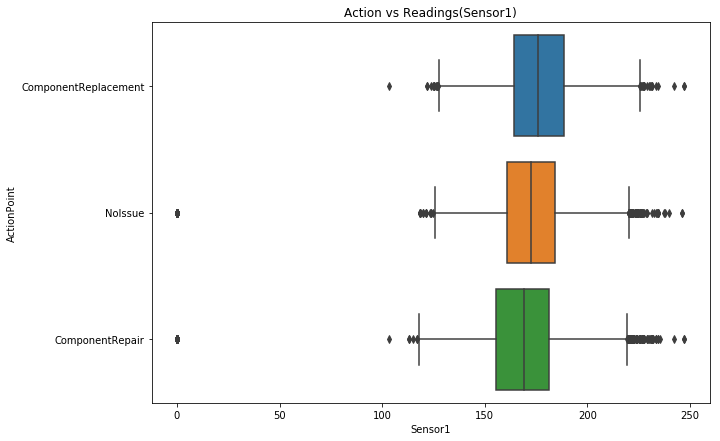

In [67]:
plt.figure(figsize = (10,7))
plt.title("Action vs Readings(Sensor1)")
plt.ylabel("Actions taken")
plt.xlabel("Sensory Readings")
sns.boxplot(final_model_dataset["Sensor1"],final_model_dataset["ActionPoint"])

Axes(0.125,0.125;0.775x0.755)


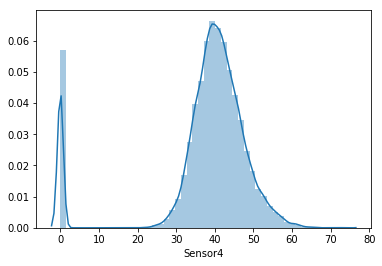

In [68]:
print(sns.distplot(final_model_dataset["Sensor4"]))

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


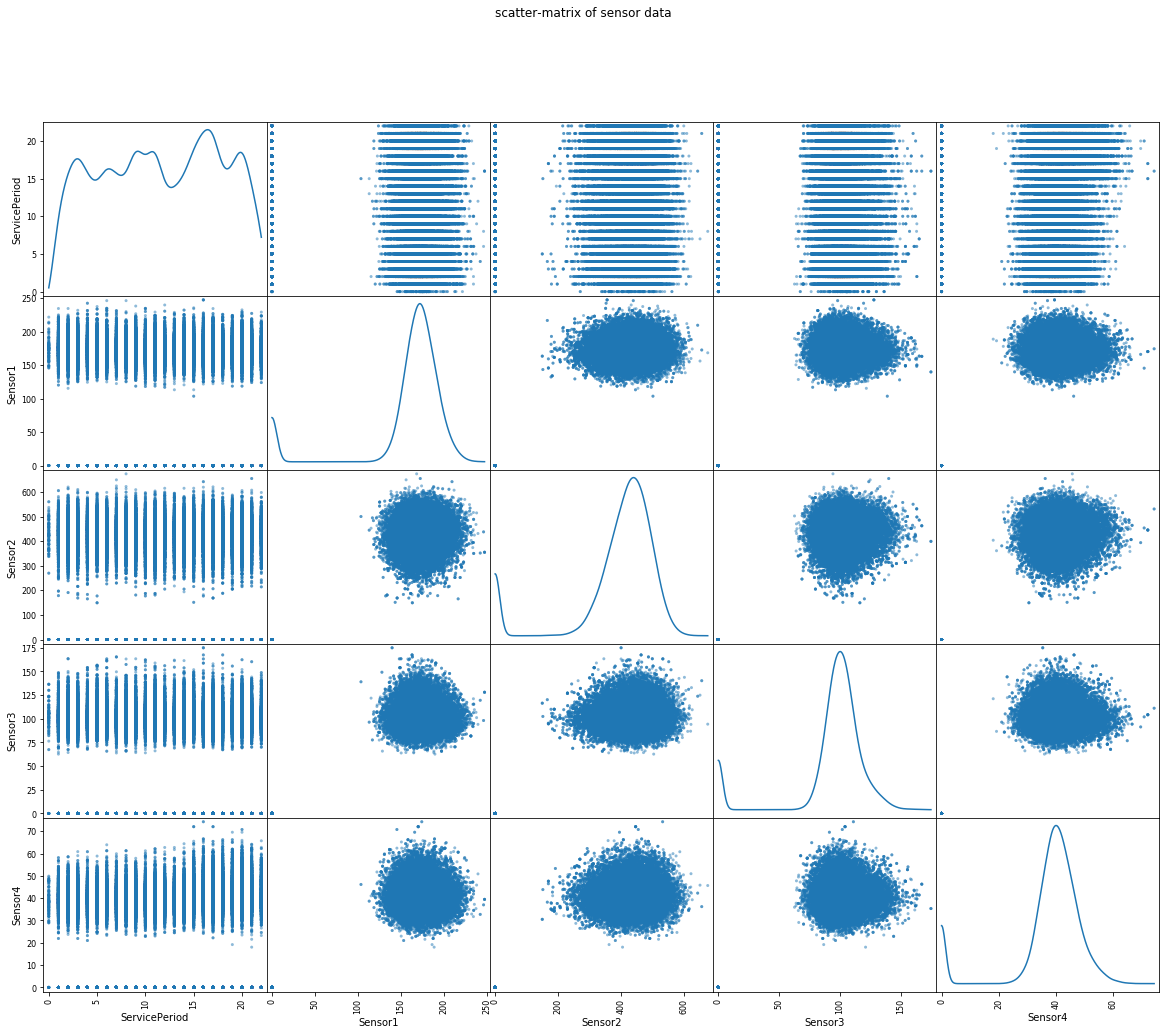

In [69]:
pd.scatter_matrix(final_model_dataset.loc[:,'MachineID':'Sensor4'], figsize=(20,16), diagonal='kde')
plt.suptitle('scatter-matrix of sensor data')
plt.show()

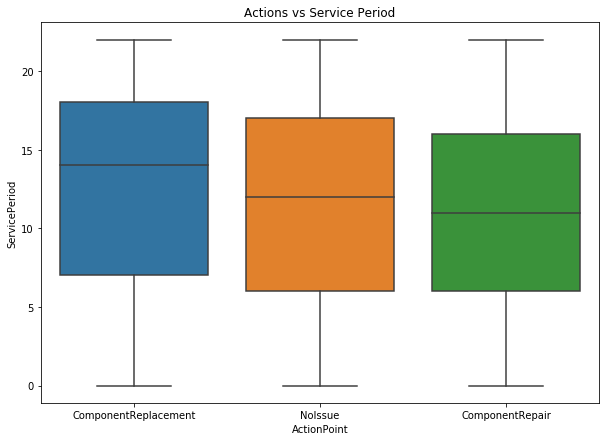

In [70]:
plt.figure(figsize = (10,7))
plt.title("Actions vs Service Period")
x = sns.boxplot(final_model_dataset["ActionPoint"],final_model_dataset["ServicePeriod"])

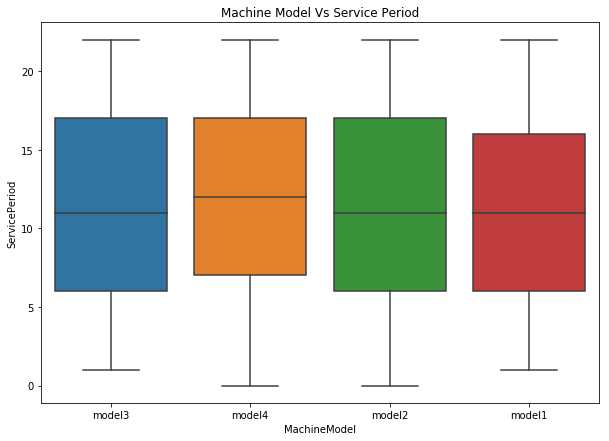

In [71]:
plt.figure(figsize = (10,7))
plt.title("Machine Model Vs Service Period")
sns.boxplot(final_model_dataset["MachineModel"],final_model_dataset["ServicePeriod"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2254ea10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x17d270d0>]], dtype=object)

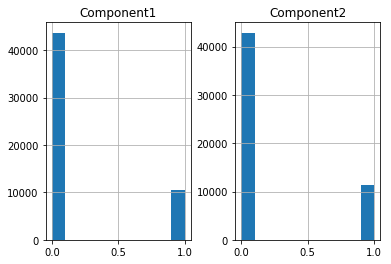

In [72]:
final_model_dataset[['Component1','Component2']].hist(grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1d4bfd90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x195f9550>]], dtype=object)

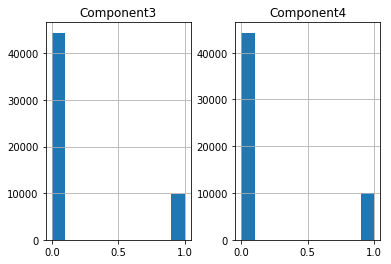

In [73]:
final_model_dataset[['Component3','Component4']].hist(grid=True)

In [74]:
#change model numbers to numerical
final_model_dataset.loc[final_model_dataset.MachineModel=="model1",'MachineModel'] = 1
final_model_dataset.loc[final_model_dataset.MachineModel=="model2",'MachineModel'] = 2
final_model_dataset.loc[final_model_dataset.MachineModel=="model3",'MachineModel'] = 3
final_model_dataset.loc[final_model_dataset.MachineModel=="model4",'MachineModel'] = 4
final_model_dataset["MachineModel"] = pd.to_numeric(final_model_dataset["MachineModel"])

In [75]:
final_model_dataset.to_csv("final_model_dataset_upd1.csv")

In [76]:
final_model_dataset.drop("ActionPoint",axis=1,inplace=True)

In [77]:
final_model_dataset.shape

(54205, 17)

In [78]:
final_model_dataset.drop_duplicates(keep=False, inplace=True)

In [79]:
final_model_dataset.shape

(40457, 17)

In [80]:
final_model_dataset.isnull().sum()

MachineID          0
MachineModel       0
ServicePeriod      0
event_timestamp    0
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
Component1         0
Component2         0
Component3         0
Component4         0
Error1             0
Error2             0
Error3             0
Error4             0
Error5             0
dtype: int64

In [81]:
print(final_model_dataset.Sensor1.skew())
print(final_model_dataset.Sensor1.kurtosis())
print(final_model_dataset.Sensor2.skew())
print(final_model_dataset.Sensor2.kurtosis())
print(final_model_dataset.Sensor3.skew())
print(final_model_dataset.Sensor3.kurtosis())
print(final_model_dataset.Sensor4.skew())
print(final_model_dataset.Sensor4.kurtosis())

-2.09301092443
3.02601052923
-1.78964892245
2.18571976778
-1.91076686465
2.65338133818
-1.74325664163
2.24402249422


In [82]:
final_model_dataset.describe()

MachineModel  ServicePeriod       Sensor1       Sensor2       Sensor3  \
count  40457.000000   40457.000000  40457.000000  40457.000000  40457.000000   
mean       2.976568      11.218677    152.751460    383.412944     90.227692   
std        0.906955       6.109844     56.826102    148.707304     34.246163   
min        1.000000       0.000000      0.000000      0.000000      0.000000   
25%        2.000000       6.000000    156.082800    370.797700     90.330300   
50%        3.000000      11.000000    169.368200    426.601500     99.173330   
75%        4.000000      16.000000    180.992900    469.314900    107.306200   
max        4.000000      22.000000    246.121500    673.863100    174.993300   

            Sensor4    Component1    Component2    Component3    Component4  \
count  40457.000000  40457.000000  40457.000000  40457.000000  40457.000000   
mean      36.180764      0.164298      0.149443      0.191561      0.182564   
std       14.039702      0.370550      0.356529      0.393535      0.386314   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       35.159490      0.000000      0.000000      0.000000      0.000000   
50%       39.611040      0.000000      0.000000      0.000000      0.000000   
75%       43.740880      0.000000      0.000000      0.000000      0.000000   
max       72.056400      1.000000      1.000000      1.000000      1.000000   

             Error1        Error2       Error3        Error4        Error5  
count  40457.000000  40457.000000  40457.00000  40457.000000  40457.000000  
mean       0.071730      0.084015      0.08006      0.041007      0.035321  
std        0.258044      0.277414      0.27139      0.198308      0.184593  
min        0.000000      0.000000      0.00000      0.000000      0.000000  
25%        0.000000      0.000000      0.00000      0.000000      0.000000  
50%        0.000000      0.000000      0.00000      0.000000      0.000000  
75%        0.000000      0.000000      0.00000      0.000000      0.000000  
max        1.000000      1.000000      1.00000      1.000000      1.000000

In [83]:
agg_dataset = pd.DataFrame(final_model_dataset.groupby('MachineID',as_index=False).agg({'Sensor1':'mean','Sensor2':'mean','Sensor3':'mean','Sensor4':'mean','MachineModel':'mean','ServicePeriod':'mean','Component1':'sum','Component2':'sum','Component3':'sum','Component4':'sum','Error1':'sum','Error2':'sum','Error3':'sum','Error4':'sum','Error5':'sum'}))
### .mean()

In [84]:
agg_dataset.shape

(1150, 16)

In [85]:
agg_dataset.head(100)

MachineID  Error1  Error2  Error3  Error4  Error5  Component4  \
0   MID10801       3       4       5       2       4           4   
1   MID10802       2       3       3       1       2           9   
2   MID10803       6       4       4       6       3           2   
3   MID10804       3       4       4       6       4           5   
4   MID10805       3       2       2       4       5           6   
5   MID10806       2       2       1       3       6           2   
6   MID10807       2       2       1       4       2           5   
7   MID10808       5       4       3       0       4           4   
8   MID10809       5       3       4       0       3           5   
9   MID10810       2       2       2       1       3           3   
10  MID10811       2       2       3       0       3           5   
11  MID10812       1       4       2       0       3           7   
12  MID10813       1       1       2       2       4           4   
13  MID10814       3       3       3       1       5           6   
14  MID10815       2       2       1       1       3           3   
15  MID10816       3       2       2       1       5           2   
16  MID10817       0       2       2       1       3           2   
17  MID10818       3       3       3       0       3           7   
18  MID10819       1       4       4       0       4           7   
19  MID10820       4       2       2       1       4           6   
20  MID10821       1       2       1       4       4           4   
21  MID10822       1       2       3       0       3           3   
22  MID10823       3       5       4       6       4           4   
23  MID10824       2       3       3       1       3           5   
24  MID10825       1       3       3       0       5           3   
25  MID10826       1       5       5       1       5           4   
26  MID10827       1       2       2       0       5           3   
27  MID10828       2       3       4       5       4           3   
28  MID10829       3       4       4       0       4           2   
29  MID10830       2       3       4       3       2           3   
..       ...     ...     ...     ...     ...     ...         ...   
70  MID10871       4       4       5       3       0           6   
71  MID10872       2       5       5       1       0          10   
72  MID10873       1       2       1       2       0           9   
73  MID10874       3       2       1       0       0          10   
74  MID10875       3       2       2       0       0           6   
75  MID10876       4       4       3       2       0           5   
76  MID10877       2       6       2       0       0           8   
77  MID10878       4       1       3       0       0           5   
78  MID10879       4       5       4       0       0           8   
79  MID10880       3       5       6       3       0           9   
80  MID10881       3       2       1       1       1           9   
81  MID10882       1       3       1       1       0           8   
82  MID10883       4       1       1       4       0           8   
83  MID10884       1       3       4       0       0          10   
84  MID10885       2       2       1       1       0          11   
85  MID10886       5       1       0       0       0           7   
86  MID10887       4       6       5       0       0          12   
87  MID10888       3       2       2       4       0           7   
88  MID10889       4       2       2       1       1           7   
89  MID10890       0       0       2       3       0          14   
90  MID10891       3       5       4       0       1           8   
91  MID10892       4       3       3       1       0           6   
92  MID10893       5       4       7       0       0           8   
93  MID10894       2       3       3       0       0           6   
94  MID10895       3       2       2       3       0           7   
95  MID10896       4       4       4       0       0           6   
96  MID10897       2       3       3       2       0       

In [86]:
train_data_model = pd.merge(train_data,agg_dataset,how="left",left_on=["MachineID"],right_on=["MachineID"])

In [87]:
train_data_model.dtypes

MachineID         object
ActionPoint       object
Error1             int64
Error2             int64
Error3             int64
Error4             int64
Error5             int64
Component4         int64
MachineModel       int64
ServicePeriod      int64
Component1         int64
Component3         int64
Component2         int64
Sensor1          float64
Sensor3          float64
Sensor2          float64
Sensor4          float64
dtype: object

In [88]:
train_data_model.shape

(674, 17)

In [89]:
test_data = pd.read_csv("Test.csv")

In [90]:
test_data_model = pd.merge(test_data,agg_dataset,how="left",left_on=["MachineID"],right_on=["MachineID"])

In [91]:
test_data_model.shape

(326, 16)

In [92]:
#final_model_dataset.to_csv("final_model_dataset.csv")
train_data_model.to_csv("train_data_model.csv")
test_data_model.to_csv("test_data_model.csv")